In [1]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns 
import scikitplot as skplt 
from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #класс оценок

#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("C:/Users/User/Downloads/Twitter_Data.csv", encoding = 'latin-1', nrows=2000)

In [4]:
df.columns = ['Message', 'Label']
df.dropna(subset=['Message'], inplace=True)
df.head()

,Message,Label
0,when modi promised âminimum government maxim...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [5]:
df_labels = df['Label']
df_labels.head(11)

0    -1
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    1
Name: Label, dtype: int64

In [6]:
# Stopwords
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

negative_dataset = df[df.Label == -1.0]
positive_dataset = df[df.Label == 1.0]
neutral_dataset = df[df.Label == 0.0]
neutral_words = ' '
positive_words = ' '
negative_words=''


In [7]:
for words in negative_dataset.Message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        negative_words = negative_words + word + " "
negative_words

'when modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party didnâ\x80\x99 write chowkidar does mean â\x80\x99 anti modi try visit the plz not all who havenâ\x80\x99 used are anti with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh thiugh nehru not alive but still alive heart modi for every failure nehru responsible modi govts slashing indias education budget clear indicator that they dont care for 

In [9]:
from PIL import Image

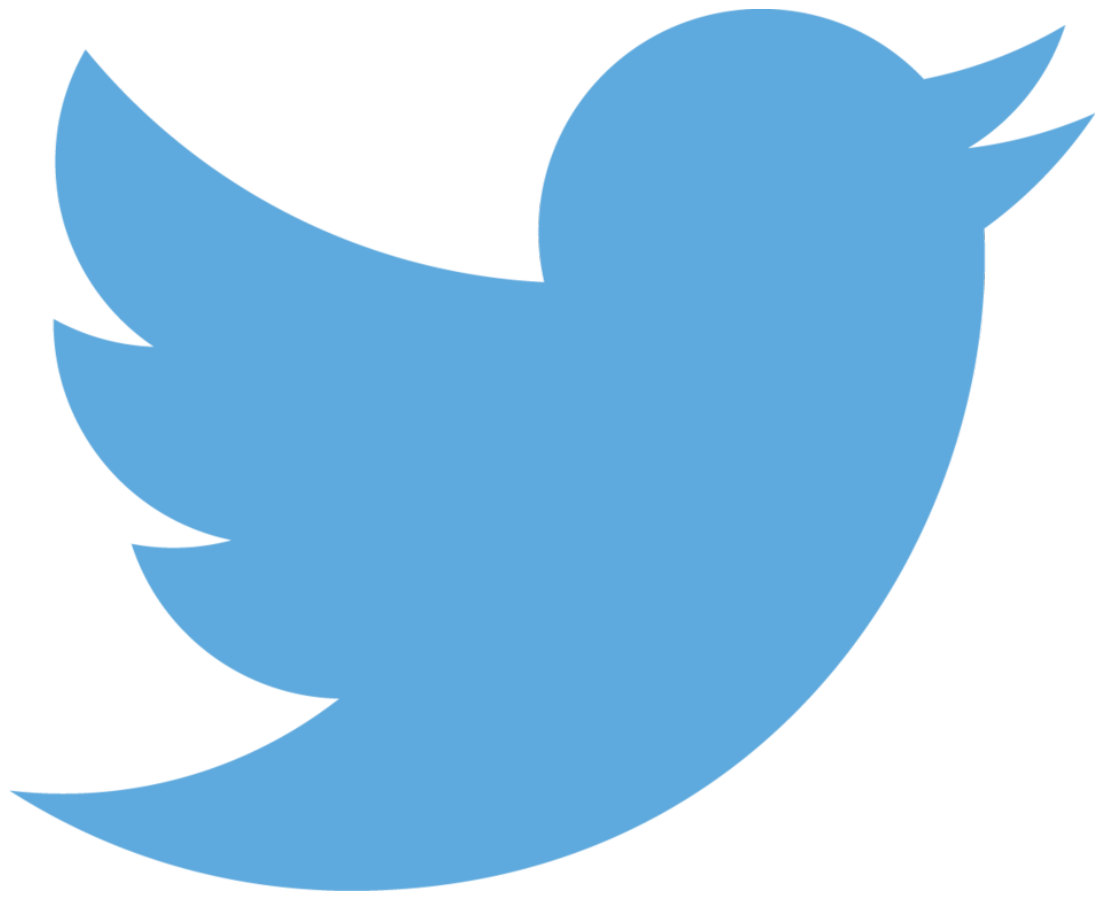

In [27]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [28]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [29]:
import random

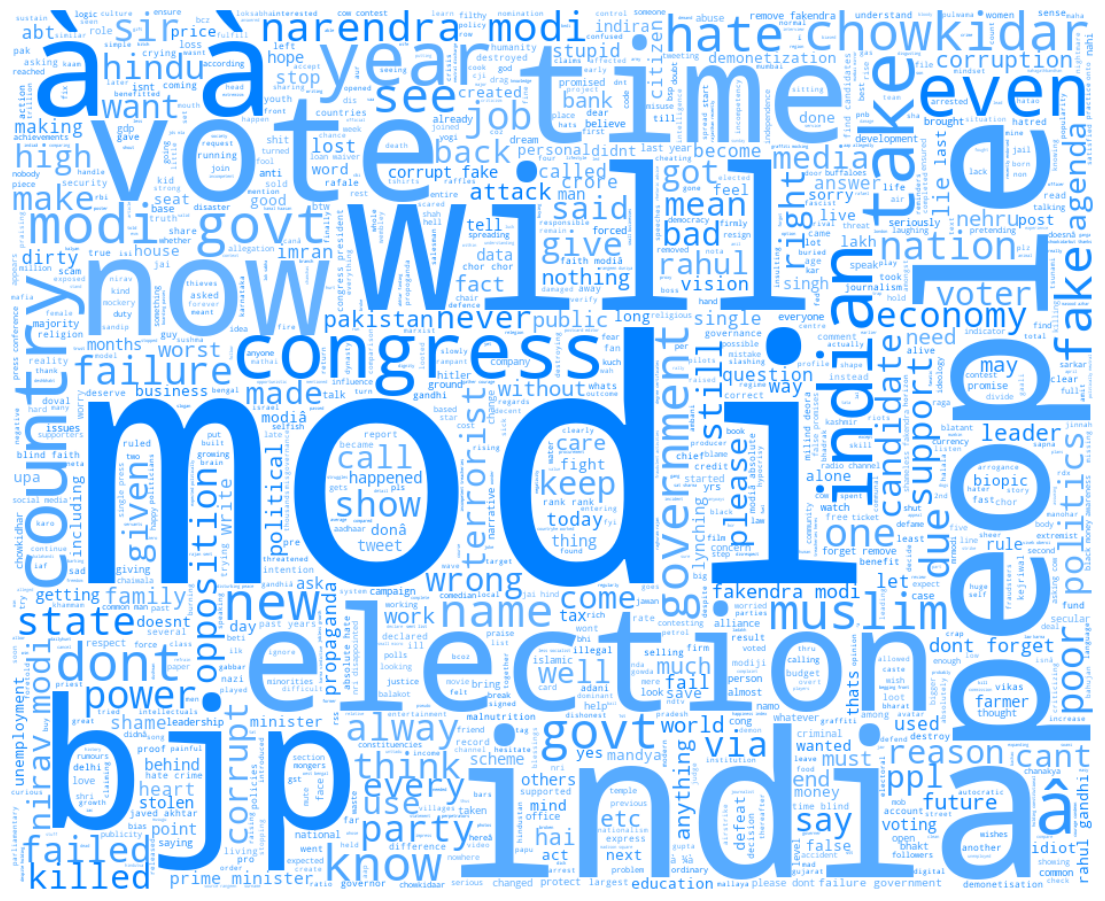

In [30]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(negative_words)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()